## **Week-2** Creating a Simple Agent using Reinforcement Learning 
## **200968108 DSE-A 27**

#### Installing the tensorflow agents package

In [1]:
!pip install tf-agents[reverb]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Using the CartPole-v0 Environment and writing a program to**

Importing required libraries

In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import abc
import tensorflow as tf
import numpy as np

from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts


#### Loading the **CartPole environment** from the openAI gym suite and taking a look at the **action** and **time_step_spec**.

In [3]:
# loading the cartpole-v0 env.
environment = suite_gym.load('CartPole-v0')

print('action_spec:', environment.action_spec())

print('\ntime_step_spec.observation:', environment.time_step_spec().observation)
print('\ntime_step_spec.step_type:', environment.time_step_spec().step_type)
print('\ntime_step_spec.discount:', environment.time_step_spec().discount)
print('\ntime_step_spec.reward:', environment.time_step_spec().reward)


action_spec: BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)

time_step_spec.observation: BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])

time_step_spec.step_type: ArraySpec(shape=(), dtype=dtype('int32'), name='step_type')

time_step_spec.discount: BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0)

time_step_spec.reward: ArraySpec(shape=(), dtype=dtype('float32'), name='reward')


Wrapping the **Python** environment into a **TensorFlow** environment using the `TFPyEnvironment` wrapper.

In [4]:
tf_env = tf_py_environment.TFPyEnvironment(environment)

print(isinstance(tf_env, tf_environment.TFEnvironment))
print("\nTimeStep Specs:", tf_env.time_step_spec())
print("\nAction Specs:", tf_env.action_spec())

True

TimeStep Specs: TimeStep(
{'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type')})

Action Specs: BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0), maximum=array(1))


We can observe that the specs are now of type: `(Bounded)TensorSpec`.

### **Running the CartPole-v0 environment.**
**a.Implement the CartPole environment for a certain number of steps**
* Every cycle of state-action-reward is called a step. 


In [5]:
# reset() creates the initial time_step after resetting the environment.
time_step = tf_env.reset()

num_steps = 10

transitions = []
reward = 0
for i in range(num_steps):
  action = tf.constant([i % 2])
  # applies the action and returns the new TimeStep.
  next_time_step = tf_env.step(action)
  transitions.append([time_step, action, next_time_step])
  reward += next_time_step.reward
  time_step = next_time_step

np_transitions = tf.nest.map_structure(lambda x: x.numpy(), transitions)
print('\n\n\n'.join(map(str, np_transitions)))
print('\n\nTotal rewards:', int(reward))

[TimeStep(
{'discount': array([1.], dtype=float32),
 'observation': array([[ 0.03550508,  0.01080811,  0.03991103, -0.04246571]],
      dtype=float32),
 'reward': array([0.], dtype=float32),
 'step_type': array([0], dtype=int32)}), array([0], dtype=int32), TimeStep(
{'discount': array([1.], dtype=float32),
 'observation': array([[ 0.03572123, -0.18486275,  0.03906171,  0.2625376 ]],
      dtype=float32),
 'reward': array([1.], dtype=float32),
 'step_type': array([1], dtype=int32)})]


[TimeStep(
{'discount': array([1.], dtype=float32),
 'observation': array([[ 0.03572123, -0.18486275,  0.03906171,  0.2625376 ]],
      dtype=float32),
 'reward': array([1.], dtype=float32),
 'step_type': array([1], dtype=int32)}), array([1], dtype=int32), TimeStep(
{'discount': array([1.], dtype=float32),
 'observation': array([[ 0.03202398,  0.00968049,  0.04431247, -0.01757345]],
      dtype=float32),
 'reward': array([1.], dtype=float32),
 'step_type': array([1], dtype=int32)})]


[TimeStep(
{'discoun

**b.Implement the CartPole environment for a certain number of episodes**
* The reinforcement learning system continues to iterate through cycles until it reaches the desired state or a maximum number of steps are expired. This series of steps is called an episode.

* An episode is larger than a step and usually contains many steps

In [11]:
# defining the number of episodes

num_episodes = 10

time_step = tf_env.reset()
avg_rewards_list = []
steps = []

for i in range(num_episodes):

  episode_reward = 0
  episode_steps = 0

  while not time_step.is_last():
    action = tf.random.uniform([1], 0, 2, dtype=tf.int32)
    time_step = tf_env.step(action)
    episode_steps += 1
    episode_reward += time_step.reward.numpy()

  steps.append(episode_steps)
  time_step = tf_env.reset()


  num_steps = np.sum(steps)
  avg_length = np.mean(steps)
  avg_rewards_list.append(avg_length)

  print('Episode:', (i+1),'\tSteps: ', episode_steps)

print("\n\nEpisodes: ",num_episodes)
print('\nTotalsteps:', num_steps)
print('\navg_length: ', avg_length)


Episode: 1 	Steps:  12
Episode: 2 	Steps:  17
Episode: 3 	Steps:  21
Episode: 4 	Steps:  34
Episode: 5 	Steps:  15
Episode: 6 	Steps:  23
Episode: 7 	Steps:  48
Episode: 8 	Steps:  22
Episode: 9 	Steps:  17
Episode: 10 	Steps:  29


Episodes:  10

Totalsteps: 238

avg_length:  23.8


In [12]:
print("Avg. Total Rewards over ",num_episodes,' episodes is ',avg_rewards_list[-1])

Avg. Total Rewards over  10  episodes is  23.8


#### **Vizualising the avg. rewards acquired after each episode**

Text(0.5, 0, 'Episodes')

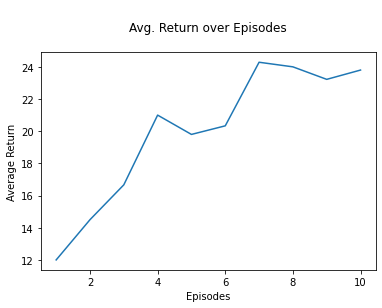

In [13]:
import matplotlib.pyplot as plt

iterations = range(1, num_episodes+1)
plt.plot(iterations, avg_rewards_list)
plt.title("\nAvg. Return over Episodes\n")
plt.ylabel('Average Return')
plt.xlabel('Episodes')


### **c.Compare and comment on the rewards earned for both approaches.**


* In the first approach, we can observe that total rewards[10] is always the 
same as no. of steps[10] defined, but in the second approach total rewards[24] are greater than no. of given episodes[10].
* Hence, we can say implementing the cartpole environment on certain number of episodes would give us a better result as the number of rewards are always greater.
* As the agent trains a policy to choose actions to maximize the sum of rewards, also known as return, the approach which includes running certain number of episodes is a better and an efficient one.